# Introduction to NumPy

The fundamental package for scientific computing with Python: https://numpy.org/ \
(**paper**) [Nature **585**, 357(2020)](https://doi.org/10.1038/s41586-020-2649-2) 

**Abstract**\
Array programming provides a powerful, compact and expressive syntax for accessing, manipulating and operating on data in vectors, matrices and higher-dimensional arrays.\
NumPy is the primary array programming library for the Python language.\
It has an essential role in research analysis pipelines in fields as diverse as physics, chemistry, astronomy, geoscience, biology, psychology, materials science, engineering, finance and economics.\
For example, in astronomy, NumPy was an important part of the software stack used in the discovery of gravitational waves and in the first imaging of a black hole. 


## References
1. https://library.mcmaster.ca/intro-python-programming
2. https://numpy.org/doc/stable/user/quickstart.html
3. https://training.sharcnet.ca/courses/enrol/index.php?id=132

## Notes:
To open on Google Colab\
https://colab.research.google.com/github/RodrigoAVargasHdz/CHEM-4PB3/blob/main/Course_Notes/Week1/intro_numpy.ipynb


In [2]:
# load numpy as np
import numpy as np 

# Arrays
([additional tutorial](https://www.learndatasci.com/tutorials/applied-introduction-to-numpy-python-tutorial/))

<!-- ![Arrays](/Users/ravh011/Documents/McMaster/Courses/CHEM_4PB3_2022/Course_Notes/Figures/numpy-vector-matrix-3d-matrix.jpg) -->
<!-- ![Arrays](../Figures/numpy-vector-matrix-3d-matrix.jpg) -->
![Arrays](https://raw.github.com/RodrigoAVargasHdz/CHEM-4PB3/master/Course_Notes/Figures/numpy-vector-matrix-3d-matrix.jpg)

In [3]:
X = np.array([[1, 2], [3, 4]])  # Defining arrays

print('X =\n',X)
print('\n')
print('X type:', type(X))
print('\n')
n_rows, n_cols = X.shape
print('Size:')
print('number of rows:',n_rows)
print('number of columns:', n_cols)

X =
 [[1 2]
 [3 4]]


X type: <class 'numpy.ndarray'>


Size:
number of rows: 2
number of columns: 2


## Change array's values

```X[i,j]``` -> single element in the i-th row and j-th column\
```X[:,j]``` -> all elements in the j-th column\
```X[i,:]``` -> all elements in the i-th row

this notation is called **slicing** ([more info](https://stackoverflow.com/questions/509211/understanding-slicing))

In [7]:
print('Original: \n', X)
print('\n')
print('X[0,0] = ', X[0,0])
X[0,0] = 10
print('\n')
print('Modified: \n', X)

print('\n')
X[:,-2] = -25 # -1 last column
print('Modified: \n', X)


Original: 
 [[10 -2]
 [ 3 -2]]


X[0,0] =  10


Modified: 
 [[10 -2]
 [ 3 -2]]


Modified: 
 [[ 10 -25]
 [  3 -25]]


## Excercises
(tips) [NumPy documentation](https://numpy.org/doc/stable/index.html)

In [10]:
# create an array full of zeros with size (10,4)
x = np.array([[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]])
print(x.shape)
x = np.ones((10,4))
print(x.shape)

(10, 4)
(10, 4)


In [12]:
# create an array full of zeros with size (12,) where the element 6 has a value of 4
x = np.zeros((12))
x[5] = 4
print(x)

[0. 0. 0. 0. 0. 4. 0. 0. 0. 0. 0. 0.]


# The power of NumPy

Here we revise some operations we can do using Numpy

In [13]:
import pandas as pd

#load some data (example from https://dmol.pub/)
data_url = "https://github.com/RodrigoAVargasHdz/CHEM-4PB3/raw/main/Course_Notes/data/solubility.csv"
data = pd.read_csv(data_url)
solubility = np.asarray(data.Solubility)
print('Total number of points = ', solubility.shape[0])

Total number of points =  9982


## mean and standard deviation

$\mu = \frac{1}{N}\sum_i^{N} x_i$\
$\sigma =  \sqrt\frac{\sum_i^{N}{(x_i-\mu)^2}}{N}$


In [63]:
mu = np.mean(solubility)
print('mean = ', mu)
std = np.std(solubility)
print('std = ', std)

mean =  -2.8899088047869865
std =  2.368035824195331


## Exercises

Create a function that computes the **mean** and **standard deviation** for a given array.

**tips**:
* look at the above equations!
* ```np.sum()```
* ```np.sqrt()```
* ```D.shape```
* ```np.power()``` or ```a**0.5```

In [14]:
def f(x):
    N = x.shape[0]
    mu = np.sum(x)/N # compute mean

    # std =  np.sqrt(np.sum(np.power(x-mu,2))/N)# compute st
    std = f_std(x,mu)
    
    return mu, std

def f_std(x,mu):
    z = np.power(x-mu,2)
    print(type(z))
    z = np.sum(z)/N
    print(type(z))
    std = np.sqrt(z)
    return std
    
print(f(solubility))

<class 'numpy.ndarray'>
<class 'numpy.float64'>
(-2.8899088047869865, 2.368035824195331)


## Exercises
1. 10 lowest solubility values from the data set
2. Median of the solubility dataset (what are the two operations you need?)

In [16]:
# code here
x_sort = np.sort(solubility)
print(x_sort[-10:])

[1.5808     1.58231334 1.59562881 1.62644072 1.63023513 1.6988
 1.70091591 1.90829979 1.9675127  2.13768162]


# Tensors (Matrices of Matrices)

What data structure could be represented with **TENSORS**?

<!-- ![Arrays](/Users/ravh011/Documents/McMaster/Courses/CHEM_4PB3_2022/Course_Notes/Figures/numpy-vector-matrix-3d-matrix.jpg) -->
![Arrays](https://raw.github.com/RodrigoAVargasHdz/CHEM-4PB3/master/Course_Notes/Figures/numpy-vector-matrix-3d-matrix.jpg)

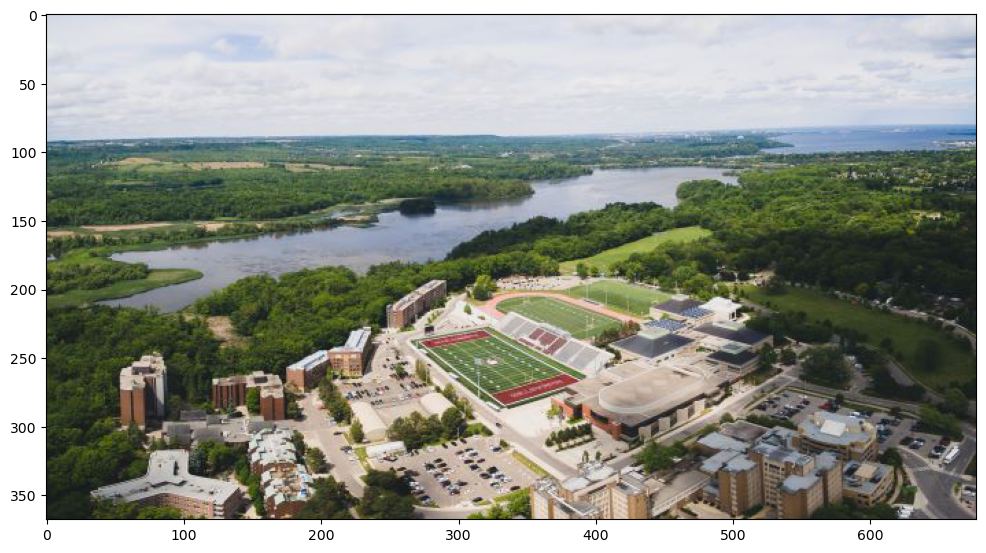

In [17]:
%matplotlib inline
from PIL import Image
import requests  # pip install requests
from io import BytesIO

import matplotlib
import matplotlib.pyplot as plt

# load image
img_url = 'https://future.mcmaster.ca/wp-content/uploads/2020/07/Campus-with-Cootes_jpg.jpg'
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))

fig = plt.figure(figsize=(12, 8), dpi=100, facecolor='w', edgecolor='k')
plt.imshow(img)


In [18]:
# convert image to NumPy
img_np = np.asarray(img)
print('Size = ',img_np.shape)

Size =  (368, 678, 3)


RGB image. R, G, and B channels

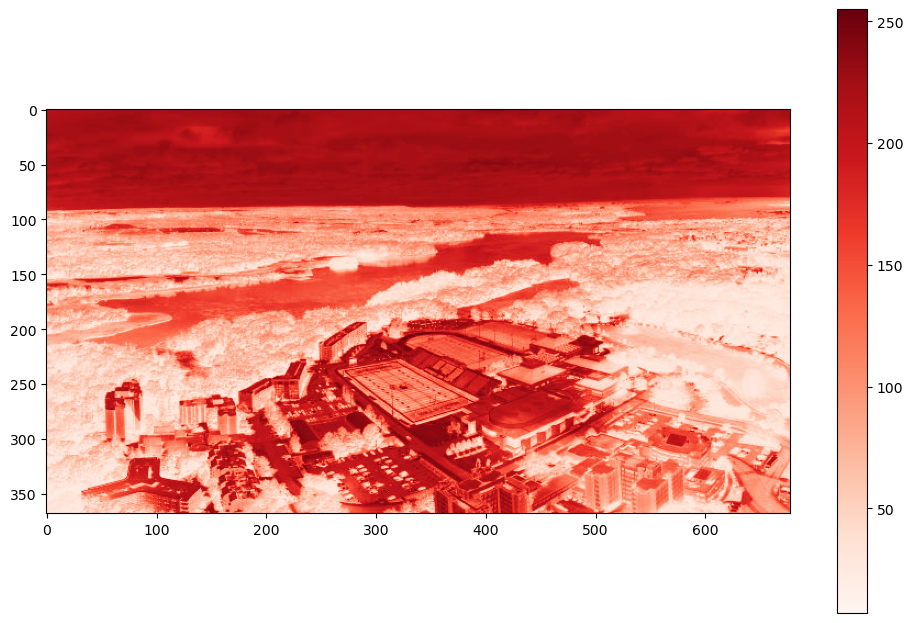

In [24]:
color = 'red'

fig = plt.figure(figsize=(12, 8), dpi=100, facecolor='w', edgecolor='k')#lager figure 
if color == 'red':
    imgplot = plt.imshow(img_np[:,:,0],cmap=matplotlib.cm.Reds)
    plt.colorbar()
elif color == 'green':
    imgplot = plt.imshow(img_np[:, :, 1], cmap=matplotlib.cm.Greens)
    plt.colorbar()
elif color == 'blue':
    imgplot = plt.imshow(img_np[:, :, -1], cmap=matplotlib.cm.Blues)
    plt.colorbar()


## Exercises
* Compute the mean pixel value of each color channel 
* What is the color channel that has the greatest distribution of color?

What is the average and std pixel value for ech color chanel?

In [23]:
# code here
print(np.mean(img_np,axis=(0,1,4)))

[131.86514044 135.32914102 124.45140358]
